<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clustering_complete_5_pca_and_kmeans%2012%20cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [6]:
data = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")

In [7]:
data["sys_dia"] = data["systolic"] / data['diastolic']

In [8]:
data.head()

,Unnamed: 0,systolic,diastolic,pca1,pca2,sys_dia
0,0,144.43,52.947,0.448304,0.068589,2.727822
1,1,144.43,52.947,0.108880,-0.028446,2.727822
2,2,143.36,52.752,0.464056,0.471354,2.717622
3,3,146.48,54.998,-0.089028,-0.016251,2.663370
4,4,177.11,65.060,-0.213127,0.035350,2.722256


In [10]:
data.shape

(205851, 3)

In [9]:

data = data.drop("diastolic",axis = 1)
data = data.drop("systolic",axis = 1)
data = data.drop("Unnamed: 0",axis = 1)

In [11]:

data.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


In [12]:
pca100 = pd.read_csv("/content/gdrive/MyDrive/data/pca100_200000.csv")

In [13]:
pca100 = pca100.drop("Unnamed: 0",axis = 1)

In [14]:
pca100.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.077099,0.008250,0.089586,-0.289935,-0.570302,-0.484658,-0.344536,0.136777,0.164105,0.473387,...,-0.304129,0.066408,-0.684151,0.248354,0.283769,-0.099543,-0.047795,0.073108,-0.007069,-0.043373
1,-0.037167,0.024483,-0.269724,0.003319,0.651969,-0.124959,-0.540595,-0.387883,-2.615635,0.288488,...,-0.021529,0.020735,0.039339,-0.075257,0.054235,0.074464,-0.025567,-0.278888,-0.292766,0.328671
2,-0.043720,0.070500,-0.033452,-0.104492,-0.270062,-0.616881,-0.877861,0.467273,-1.285693,-0.838808,...,-0.020174,-0.018929,0.004956,0.020363,-0.074594,0.122422,0.117770,0.058375,0.219939,-0.224448
3,-0.174014,0.250102,-0.146418,-0.262774,-0.098997,1.378107,0.706295,-1.929878,0.818218,-5.862694,...,0.031464,0.013131,0.011680,0.063911,0.091819,0.062477,-0.093273,0.062628,-0.042655,0.042015
4,0.246043,0.894327,0.282888,-1.227441,5.314705,1.737169,-6.058750,0.271721,0.450567,0.281494,...,-0.141160,0.020925,0.052590,0.193319,-0.522119,0.338197,-0.211511,0.117344,-0.017643,0.015899


In [15]:
data["pca1"] = pca100['0']
data["pca2"] = pca100['1']
data["pca3"] = pca100['2']
data["pca4"] = pca100['3']
data["pca5"] = pca100['4']


In [16]:
data.head()

,pca1,pca2,sys_dia,pca3,pca4,pca5
0,-0.077099,0.008250,2.727822,0.089586,-0.289935,-0.570302
1,-0.037167,0.024483,2.727822,-0.269724,0.003319,0.651969
2,-0.043720,0.070500,2.717622,-0.033452,-0.104492,-0.270062
3,-0.174014,0.250102,2.663370,-0.146418,-0.262774,-0.098997
4,0.246043,0.894327,2.722256,0.282888,-1.227441,5.314705


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


 
# initialise kmeans
kmeans = KMeans(n_clusters=12,max_iter = 10000)
kmeans.fit(data)
cluster_labels = kmeans.labels_


In [18]:
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [19]:
for i in range(14):
  print("number of datasets of cluster " + str(i )+  " = ",cluster_labels[cluster_labels == i].shape[0])



number of datasets of cluster 0 =  11173
number of datasets of cluster 1 =  93489
number of datasets of cluster 2 =  8558
number of datasets of cluster 3 =  11577
number of datasets of cluster 4 =  11339
number of datasets of cluster 5 =  8877
number of datasets of cluster 6 =  10985
number of datasets of cluster 7 =  11106
number of datasets of cluster 8 =  8938
number of datasets of cluster 9 =  8849
number of datasets of cluster 10 =  10094
number of datasets of cluster 11 =  10866
number of datasets of cluster 12 =  0
number of datasets of cluster 13 =  0


In [20]:
#this cell to obtain the pca of features to be able to plot them in two dimensions

from sklearn.decomposition import PCA
pca_of_ploting = PCA(n_components=2)
plt_comp = pca_of_ploting.fit_transform(data)

label0 = plt_comp[cluster_labels == 0]
label1 = plt_comp[cluster_labels == 1]
label2 = plt_comp[cluster_labels == 2]
label3 = plt_comp[cluster_labels == 3]
label4 = plt_comp[cluster_labels == 4]
label5 = plt_comp[cluster_labels == 5]
label6 = plt_comp[cluster_labels == 6]
label7 = plt_comp[cluster_labels == 7]
label8 = plt_comp[cluster_labels == 8]
label9 = plt_comp[cluster_labels == 9]
label10 = plt_comp[cluster_labels == 10]
label11 = plt_comp[cluster_labels == 11]
label12 = plt_comp[cluster_labels == 12]
label13 = plt_comp[cluster_labels == 13]


In [21]:
import matplotlib.cm as cm

x = np.arange(14)
ys = [i+x+(i*x)**2 for i in range(14)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.50980392e-01, 2.31947641e-01, 9.93158666e-01, 1.00000000e+00],
       [1.94117647e-01, 4.62203884e-01, 9.71281032e-01, 1.00000000e+00],
       [3.72549020e-02, 6.64540179e-01, 9.34679767e-01, 1.00000000e+00],
       [1.11764706e-01, 8.19740483e-01, 8.86773686e-01, 1.00000000e+00],
       [2.68627451e-01, 9.34679767e-01, 8.23252948e-01, 1.00000000e+00],
       [4.25490196e-01, 9.93158666e-01, 7.47252535e-01, 1.00000000e+00],
       [5.74509804e-01, 9.93158666e-01, 6.64540179e-01, 1.00000000e+00],
       [7.31372549e-01, 9.34679767e-01, 5.67674716e-01, 1.00000000e+00],
       [8.88235294e-01, 8.19740483e-01, 4.62203884e-01, 1.00000000e+00],
       [1.00000000e+00, 6.64540179e-01, 3.55490833e-01, 1.00000000e+00],
       [1.00000000e+00, 4.62203884e-01, 2.37935195e-01, 1.00000000e+00],
       [1.00000000e+00, 2.31947641e-01, 1.16772702e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e

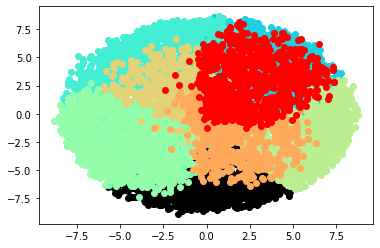

In [31]:
import matplotlib.pyplot as plt 
plt.scatter(label1[:1000,0],label1[:1000,1],color ="green" )#colors[0])
plt.scatter(label2[:1000,0],label2[:1000,1],color = "black")#colors[1])
plt.scatter(label3[:1000,0],label3[:1000,1],color ="red") #colors[2])
plt.scatter(label4[:1000,0],label4[:1000,1],color = colors[3])
plt.scatter(label5[:1000,0],label5[:1000,1],color = colors[4])
plt.scatter(label6[:1000,0],label6[:1000,1],color = colors[5])
plt.scatter(label7[:1000,0],label7[:1000,1],color = colors[6])
plt.scatter(label8[:1000,0],label8[:1000,1],color = colors[7])
plt.scatter(label9[:1000,0],label9[:1000,1],color = colors[8])
plt.scatter(label10[:1000,0],label10[:1000,1],color =colors[9])

plt.scatter(label11[:1000,0],label11[:1000,1],color =colors[10])
plt.scatter(label12[:1000,0],label12[:1000,1],color = colors[11])
plt.scatter(label13[:1000,0],label13[:1000,1],color = colors[12])
plt.scatter(label0[:1000,0],label0[:1000,1],color = colors[13])

plt.show()

In [23]:
import sklearn

sklearn.metrics.davies_bouldin_score(data.values, cluster_labels)

0.9986159769149529

In [24]:
sklearn.metrics.calinski_harabasz_score(data.values, cluster_labels)

37515.74109356271

In [25]:

colors.shape

(14, 4)

In [26]:
colors[0]

array([0.5, 0. , 1. , 1. ])

In [27]:
#pca_of_ploting.explained_variance_ratio_
plt_comp.shape

(205851, 2)

In [28]:
all_ppg_2_22 = pd.DataFrame()
for i in range(2,23):
  df = pd.read_csv("/content/gdrive/MyDrive/data/PPG_/"+str(i)+".csv")
  all_ppg_2_22 = pd.concat(objs = [all_ppg_2_22 , df] ,axis = 0,ignore_index = True )
  print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [29]:
all_ppg_2_22

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.626660,0.547210,0.47260,0.406270,0.350510,0.306410,0.27399,0.25228,0.23964,0.23397,...,0.74482,0.82479,0.88590,0.92470,0.93946,0.93015,0.89849,0.84767,0.78203,0.706600
1,0.038500,0.057440,0.08861,0.132970,0.190530,0.260180,0.33985,0.42655,0.51669,0.60637,...,0.05267,0.05805,0.06082,0.06036,0.05660,0.05009,0.04208,0.03443,0.02951,0.029980
2,0.022790,0.024570,0.02600,0.028050,0.032100,0.039810,0.05300,0.07341,0.10256,0.14146,...,0.00840,0.00365,0.00080,0.00000,0.00116,0.00397,0.00790,0.01232,0.01658,0.020160
3,0.245200,0.260090,0.27128,0.278490,0.281820,0.281700,0.27876,0.27377,0.26749,0.26060,...,0.11479,0.11281,0.11491,0.12155,0.13270,0.14788,0.16619,0.18644,0.20725,0.227260
4,0.576570,0.503680,0.42721,0.353030,0.286310,0.231070,0.18983,0.16350,0.15142,0.15160,...,0.37350,0.45685,0.53778,0.61003,0.66785,0.70663,0.72333,0.71686,0.68809,0.639870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205846,0.023608,0.006408,0.00000,0.006105,0.025813,0.059443,0.10642,0.16530,0.23382,0.30909,...,0.36970,0.33777,0.30459,0.26979,0.23327,0.19525,0.15646,0.11807,0.08173,0.049485
205847,0.200210,0.198560,0.19711,0.196190,0.196080,0.197000,0.19914,0.20256,0.20729,0.21327,...,0.18232,0.18736,0.19207,0.19617,0.19946,0.20179,0.20311,0.20346,0.20295,0.201770
205848,0.530510,0.450780,0.37326,0.303230,0.244790,0.200590,0.17170,0.15766,0.15674,0.16627,...,0.48017,0.56806,0.64505,0.70563,0.74549,0.76194,0.75419,0.72343,0.67268,0.606510
205849,0.653840,0.675060,0.69403,0.708130,0.715170,0.713620,0.70260,0.68207,0.65270,0.61576,...,0.69176,0.67078,0.64832,0.62748,0.61098,0.60085,0.59826,0.60341,0.61557,0.633120


closest point to cluster center:  [ 2.25882185  2.66652821  1.76889606  2.24802662 -1.85456189 -3.24435847]
closest index of point to cluster center:  159382
   [ 2.25882185  2.66652821  1.76889606  2.24802662 -1.85456189 -3.24435847]
closest point to cluster center:  [-5.52372322e-02 -5.78771360e-02  2.08328491e+00  3.51046850e-02
  8.02162402e-03  1.92135491e-03]
closest index of point to cluster center:  194685
   [-5.52372322e-02 -5.78771360e-02  2.08328491e+00  3.51046850e-02
  8.02162402e-03  1.92135491e-03]
closest point to cluster center:  [ 0.10585718 -6.31692756  2.06070826 -0.1774826   0.97295304  0.06932001]
closest index of point to cluster center:  59329
   [ 0.10585718 -6.31692756  2.06070826 -0.1774826   0.97295304  0.06932001]
closest point to cluster center:  [-0.33436259 -0.5437351   1.93684638 -2.57770482  2.536479   -3.89839531]
closest index of point to cluster center:  93815
   [-0.33436259 -0.5437351   1.93684638 -2.57770482  2.536479   -3.89839531]
closest poin

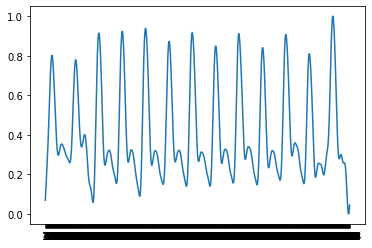

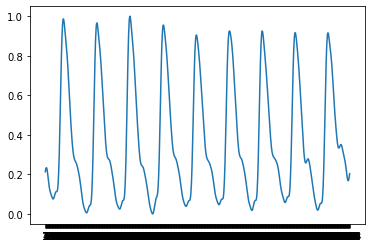

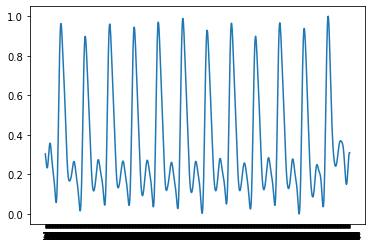

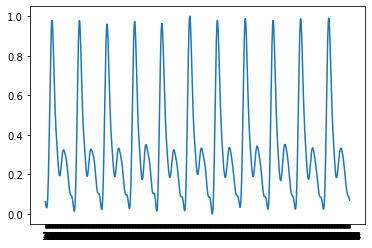

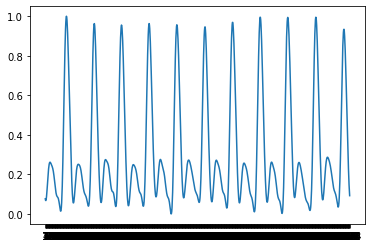

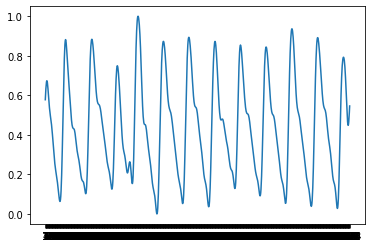

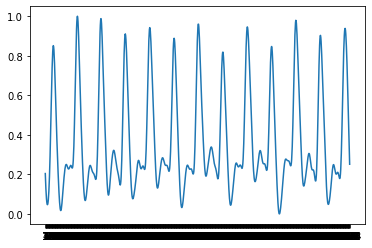

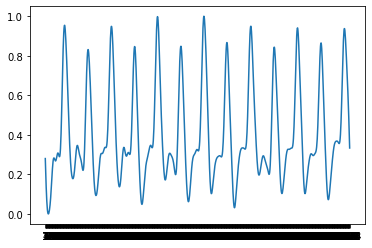

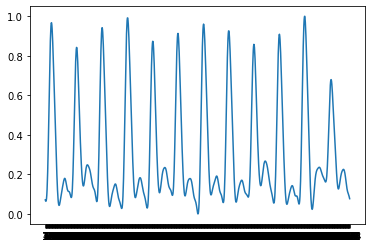

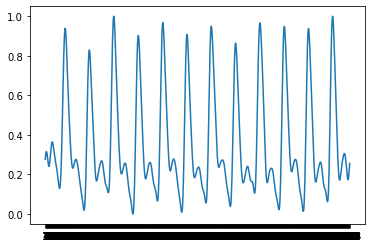

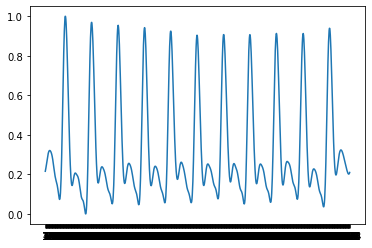

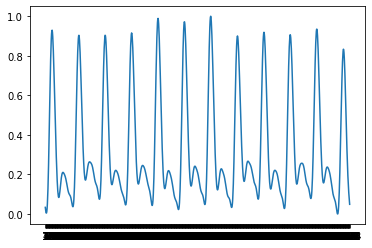

In [30]:
from scipy.spatial.distance import euclidean

# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = data.values[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(data.values[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    plt.figure(iclust)
    plt.plot(all_ppg_2_22.loc[cluster_pts_indices[min_idx]])
    print('  ', data.values[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

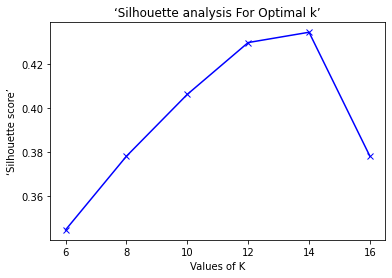

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [ 6, 8,10,12,14,16]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_
  
  # silhouette score
  silhouette_avg.append(silhouette_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel('Values of K') 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")
plt.show()

In [74]:
sys_dia_df = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")
sys_dia_df = sys_dia_df.drop("Unnamed: 0",axis = 1)
sys_dia_df = sys_dia_df.drop("pca1",axis = 1)
sys_dia_df = sys_dia_df.drop("pca2",axis = 1)
sys_dia_df.head()


,systolic,diastolic
0,144.43,52.947
1,144.43,52.947
2,143.36,52.752
3,146.48,54.998
4,177.11,65.060


mean value of systolic for cluster  0 is  132.72526770477816
mean value of systolic for cluster  1 is  132.76578658536584
mean value of systolic for cluster  2 is  130.11322762503497
mean value of systolic for cluster  3 is  131.03854486595853
mean value of systolic for cluster  4 is  132.33414952689242
mean value of systolic for cluster  5 is  131.82235365853657
mean value of systolic for cluster  6 is  131.31663123708296
mean value of systolic for cluster  7 is  132.87827309844246
mean value of systolic for cluster  8 is  134.56412342812922
mean value of systolic for cluster  9 is  131.13150154798763
mean value of systolic for cluster  10 is  131.41382579644437
mean value of systolic for cluster  11 is  132.479192194992
mean value of systolic for cluster  12 is  134.75968276533592
mean value of systolic for cluster  13 is  131.18946539222148


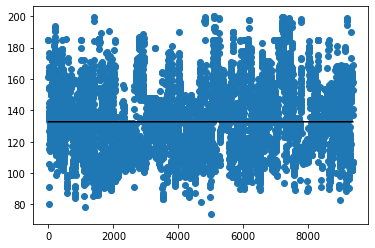

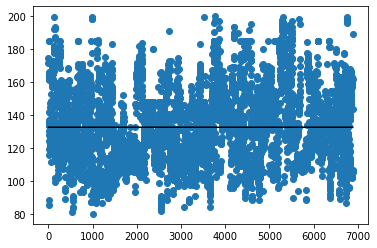

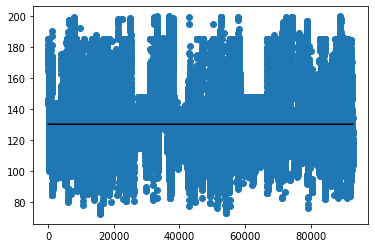

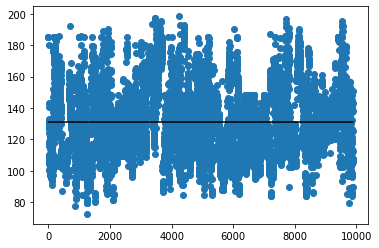

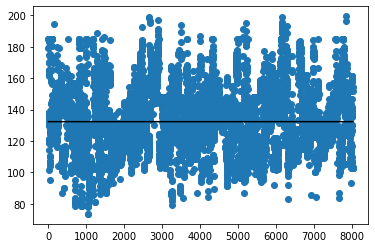

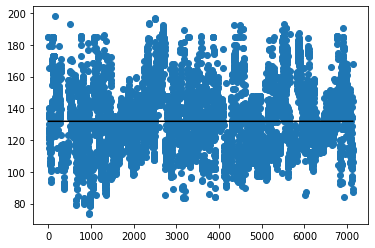

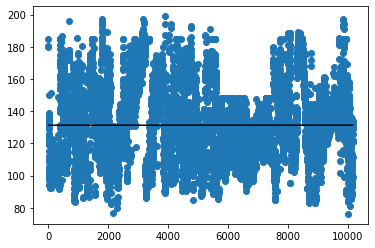

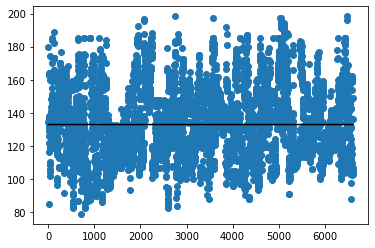

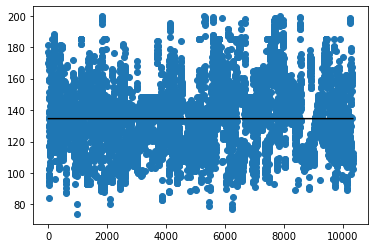

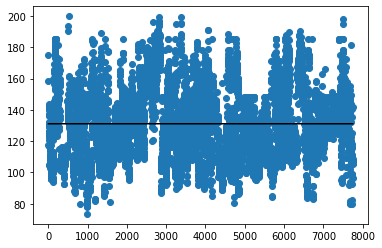

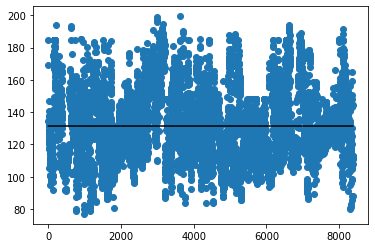

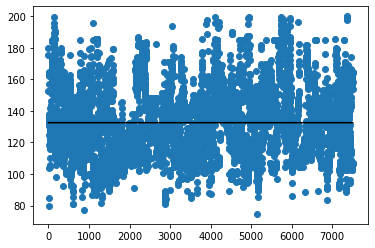

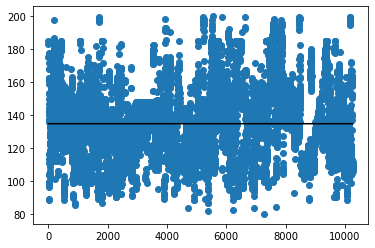

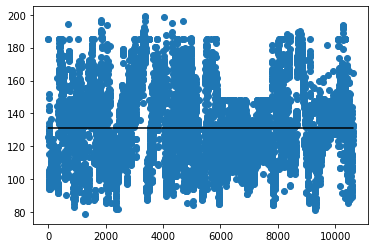

In [97]:
#ploting systolic of each cluster
dic = {}
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster [values of diastolic and systolic]:
    cluster_pts = sys_dia_df.values[kmeans.labels_ == iclust]
    dic[iclust] = cluster_pts
    plt.figure(iclust)
    plt.scatter(np.arange(len(dic[iclust][:,0])),dic[iclust][:,0])
    mean = np.mean(dic[iclust][:,0],dtype= float)
    print("mean value of systolic for cluster ",iclust,"is ",mean)
    mean_arr = np.full((len(dic[iclust][:,0]),1), mean)
    plt.plot(np.arange(len(dic[iclust][:,0])),mean_arr,color = "black")

mean value of diastolic for cluster  0 is  63.81606964590444
mean value of diastolic for cluster  1 is  63.89101146922184
mean value of diastolic for cluster  2 is  63.336111977092166
mean value of diastolic for cluster  3 is  64.86411522508851
mean value of diastolic for cluster  4 is  64.74047597111553
mean value of diastolic for cluster  5 is  65.02946635828427
mean value of diastolic for cluster  6 is  64.82835705147131
mean value of diastolic for cluster  7 is  64.62906517465598
mean value of diastolic for cluster  8 is  63.67494679822015
mean value of diastolic for cluster  9 is  64.97657907636739
mean value of diastolic for cluster  10 is  64.96184321679992
mean value of diastolic for cluster  11 is  63.970185002663825
mean value of diastolic for cluster  12 is  63.56833388510224
mean value of diastolic for cluster  13 is  64.86175920519823


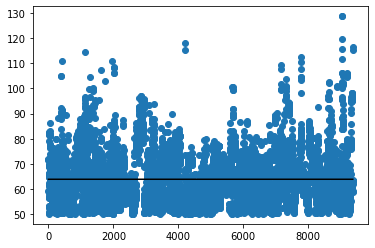

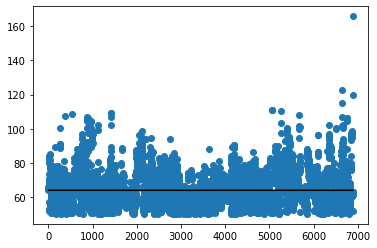

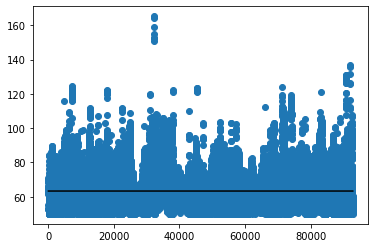

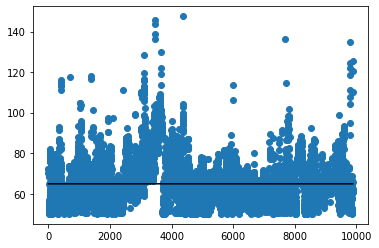

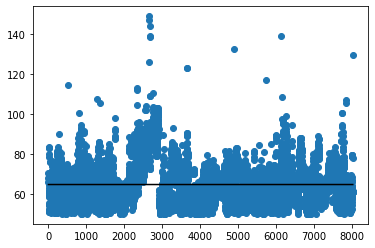

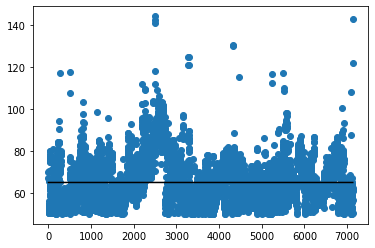

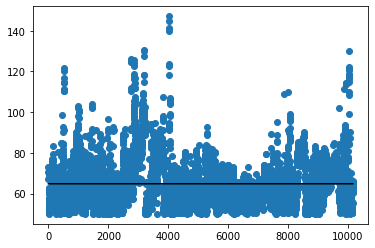

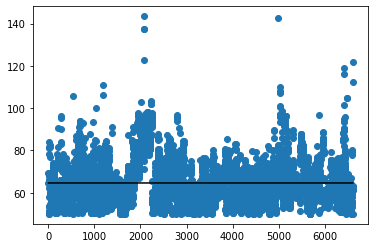

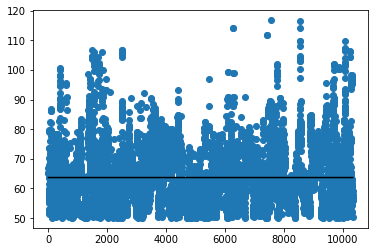

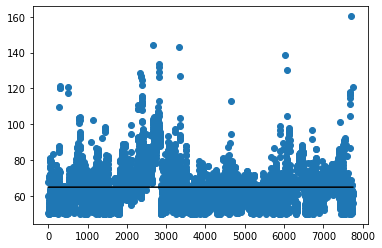

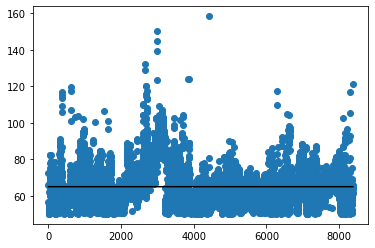

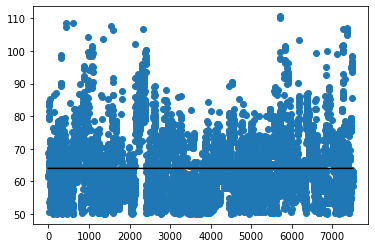

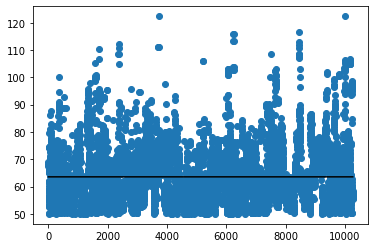

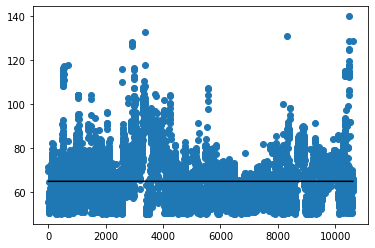

In [98]:
#ploting diastolic of each cluster
dic = {}
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster [values of diastolic and systolic]:
    cluster_pts = sys_dia_df.values[kmeans.labels_ == iclust]
    dic[iclust] = cluster_pts
    plt.figure(iclust)
    plt.scatter(np.arange(len(dic[iclust][:,1])),dic[iclust][:,1])
    mean = np.mean(dic[iclust][:,1],dtype = float )
    print("mean value of diastolic for cluster ",iclust,"is ",mean)
    mean_arr = np.full((len(dic[iclust][:,1]),1), mean)
    plt.plot(np.arange(len(dic[iclust][:,1])),mean_arr,color = "black")

mean value of systolic / diastolic for cluster  0 is  2.099281907667349
mean value of systolic / diastolic for cluster  1 is  2.096217234136809
mean value of systolic / diastolic for cluster  2 is  2.073877643525694
mean value of systolic / diastolic for cluster  3 is  2.04263694463133
mean value of systolic / diastolic for cluster  4 is  2.06799351773432
mean value of systolic / diastolic for cluster  5 is  2.051416877273572
mean value of systolic / diastolic for cluster  6 is  2.041752301013282
mean value of systolic / diastolic for cluster  7 is  2.0782687641122677
mean value of systolic / diastolic for cluster  8 is  2.1358615532263037
mean value of systolic / diastolic for cluster  9 is  2.0398854426625483
mean value of systolic / diastolic for cluster  10 is  2.045077618773974
mean value of systolic / diastolic for cluster  11 is  2.0890835813861384
mean value of systolic / diastolic for cluster  12 is  2.1425979622326525
mean value of systolic / diastolic for cluster  13 is  2.0

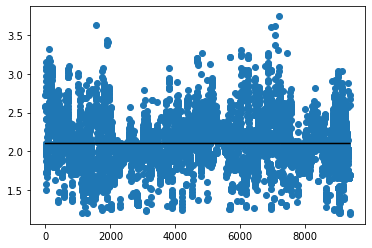

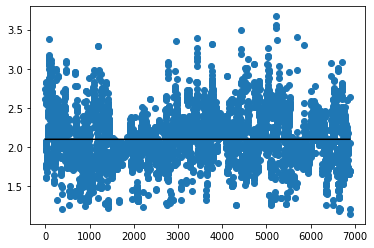

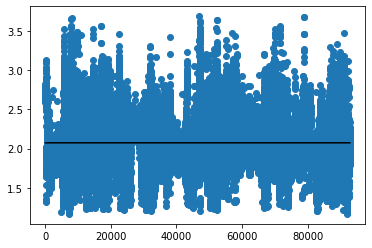

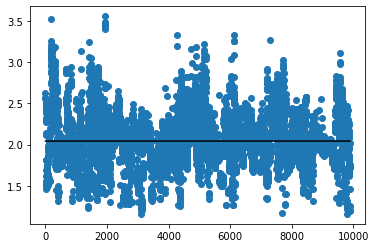

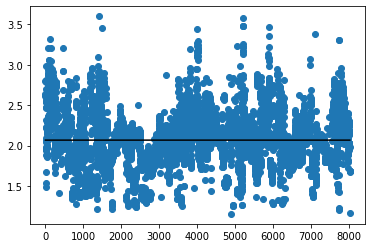

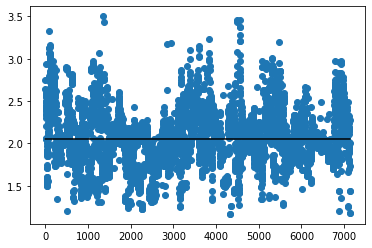

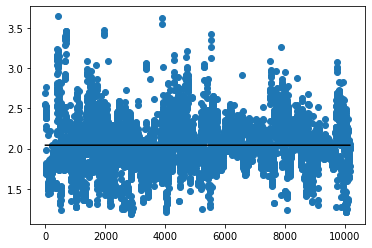

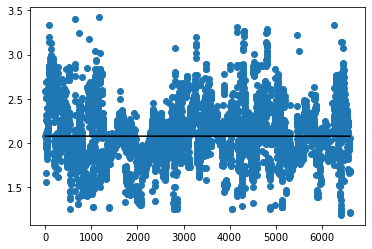

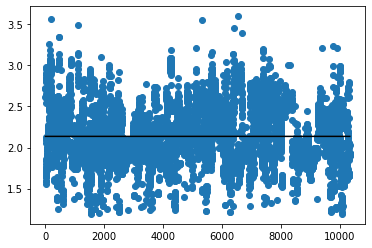

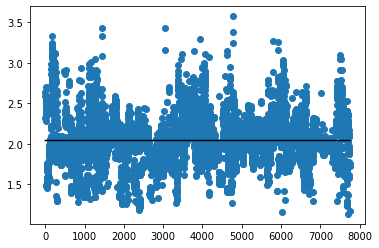

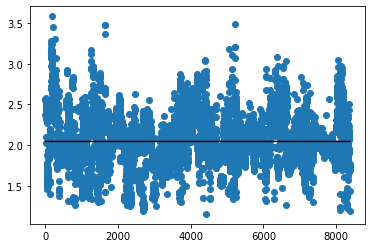

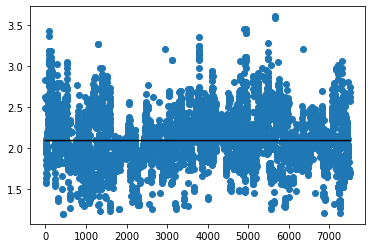

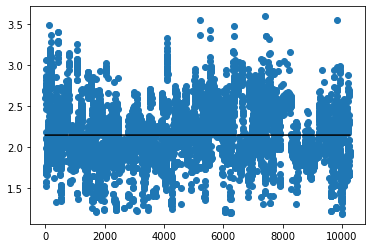

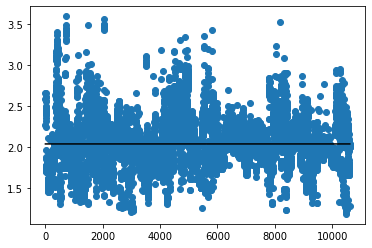

In [99]:
#ploting systolic/diastolic of each cluster
dic = {}
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster [values of diastolic and systolic]:
    cluster_pts = sys_dia_df.values[kmeans.labels_ == iclust]
    dic[iclust] = cluster_pts
    plt.figure(iclust)
    plt.scatter(np.arange(len(dic[iclust][:,0])),dic[iclust][:,0]/dic[iclust][:,1])
    mean = np.mean(dic[iclust][:,0]/dic[iclust][:,1],dtype = float)
    print("mean value of systolic / diastolic for cluster ",iclust,"is ",mean)
    mean_arr = np.full((len(dic[iclust][:,1]),1), mean)
    plt.plot(np.arange(len(dic[iclust][:,1])),mean_arr,color = "black")